<h1>Exploratory and Predictive Analysis on Heart Disease</h1>

<h4>by Jason Devers and Erica Marghescu</h4>

---

<h2>Introduction</h2>

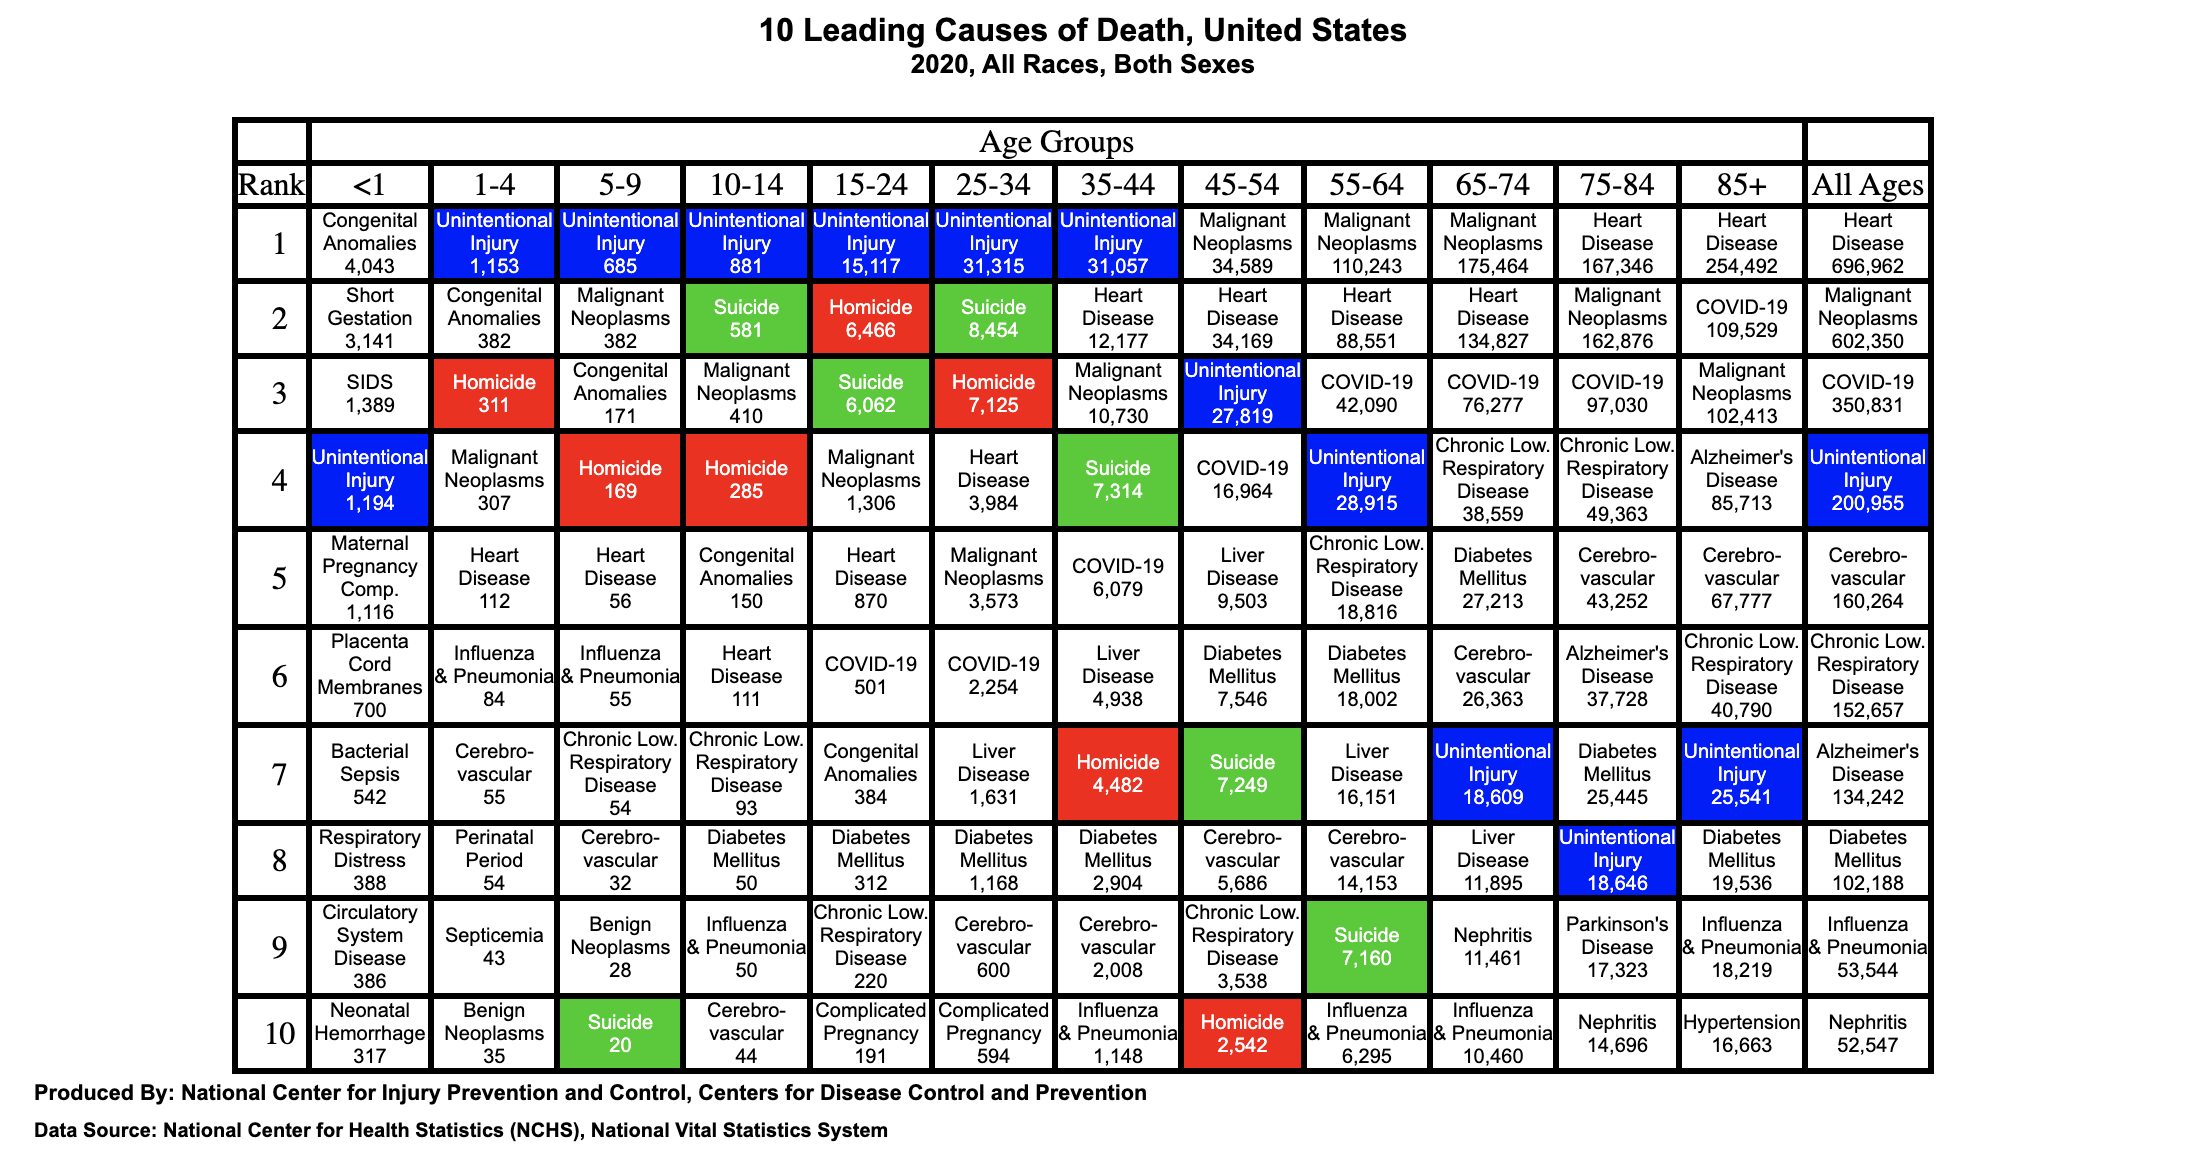

According to the [CDC](https://wisqars.cdc.gov/fatal-leading), heart disease is the _#1 leading cause of death_ across all ages, races, and sexes in the Unites States. Causing almost 700 thousand deaths over the past 20 years, it is a disease that has afflicted many families over time, and affected us personally as well. Jason's father passed away from a heart attack when he was 9. It was very unexpected, and in those times he felt almost powerless. Now, having knowledge of computer science and data science, he wanted to see if we could use the skills we learned in this class to try and make some sense out of this unexpected tragedy. Which brings us to our motivation-- **what factors most influence the chance of heart disease?** and **what demographic and health profiles are most prone to heart disease?**

In this tutorial, we will perform some exploratory data analysis to gain insights about our dataset and draw initial conclusions, use inferential statistics to determine the health profile of individuals who are most prone to heart disease, and build several classifiers to predict whether or not someone will have heart disease based on their demographic and health profile. 

---

<h2>Data Collection</h2>

In this tutorial, we make use of Python3, along with several key libraries such as [pandas](https://pandas.pydata.org/docs/), [matplotlib](https://matplotlib.org/stable/index.html), [seaborn](https://seaborn.pydata.org/), [statsmodels](https://www.statsmodels.org/stable/index.html), and more.

In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.patches
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats

import warnings
warnings.filterwarnings('ignore')

We start by collecting and displaying our data from an [online dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download&select=heart.csv):

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We add a key here for easy reference in understanding the variable names, as well as some medical definitions for better interpretation. Please visit this [resource](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/329925?resource=download&select=heart.csv) for a more detailed description.

<h4>Variable Descriptions</h4>

<h5>Continuous Variables</h5>

>**age**: years <br>

>**trtbps** (_resting blood pressure_): mm/hg <br>

>**chol** (_serum cholesterol_): mg/dl <br>

>**thalachh** (_maximum heart rate achieved_): bpm <br>

>**oldpeak** (_ST depression induced by exercise relative to rest_): mm <br>

<h5>Categorical Variables</h5>

>**sex**: <br> 
>0 = female <br>
>1 = male <br>

>**cp** (_chest pain type_): <br>
>0 = typical angina <br>
>1 = atypical angina <br>
>2 = non-anginal pain <br>
>3 = asymptomatic <br>

>**fbs** (_fasting blood sugar_): <br>
>0 = lower than or equal to 120 mg/dl <br>
>1 = greater than 120 mg/dl <br>

>**restecg** (_resting ECG_): <br>
>0 = normal <br>
>1 = ST-T wave abnormality <br>
>2 = left ventricular hypertrophy <br>

>**exng** (_exercise induced angina_): <br>
>0 = no <br>
>1 = yes <br>

>**slp** (_slope of the peak exercise ST segment_): <br>
>0 = upsloping <br>
>1 = flat <br>
>2 = downsloping <br>

>**caa** (_number of major vessels_): <br>
>0 = no major vessels <br>
>1 = 1 major vessel <br>
>2 = 2 major vessels <br>
>3 = 3 major vessels <br>

>**thall** (_thalassemia_): <br>
>1 = fixed defect <br>
>2 = normal <br>
>3 = reversible defect <br>

>**output**: <br>
>0 = no heart disease <br>
>1 = heart disease <br>

<h4>Medical Definitions</h4>

>**[Angina](https://www.nhs.uk/conditions/angina/#:~:text=Angina%20is%20chest%20pain%20caused,of%20these%20more%20serious%20problems)**: chest pain that results from reduced blood flow to the heart

>**[Cholesterol](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/cholesterol)**: a waxy, fat-like substance produced by the liver and found in the bloodstream

>**[ECG](https://www.mayoclinic.org/tests-procedures/ekg/about/pac-20384983)**: a test commonly done to identify heart problems that measures electrical signals in the heart

>**[ST Segment](https://litfl.com/st-segment-ecg-library/)**: the flat, isoelectric part of the ECG that represents the interval between ventricular depolarization and repolarization

>**[ST Depression](https://litfl.com/st-segment-ecg-library/)**: a type of ST segment abnormality

>**[Thalassemia](https://www.cdc.gov/ncbddd/thalassemia/facts.html)**: a genetic blood disorder that is characterized by a lower rate of hemoglobin than normal

---

<h2>Data Management and Representation</h2>

In this section, we will perform some _data cleaning and preprocessing_ to account for any missing data and adjust representations of our data so that the visualizations we create in the following sections are human-readable.

We start by checking if there are any missing values in the dataset:

In [3]:
df.info()
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no empty values in our dataset, which is good. However, there can be mistakes in classification. Let's check that:

In [4]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

From running this function, we can see that the output for variable 'caa' is wrong. From the definitions, 'caa' should only have values from 0-3, but the output lists a total of 5, which means there's an extra value. Let's find out what that value is:

In [5]:
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

As we can see from the output, there are some patients with a value of 4, which is an invalid data point. To mediate this, we replace all values of 4 with NaN:

In [6]:
df.loc[df['caa'] == 4, 'caa'] = np.NaN

From running the previous function, we can also see that the output for variable 'thall' is wrong. From the definitions, 'thall' should only have values from 1-3, but the output lists a total of 4, which means there's an extra value. In the same vein as we did with 'caa', we will find and replace these invalid data points:

In [7]:
df.thall.value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [8]:
df.loc[df['thall'] == 0, 'thall'] = np.NaN

Now that we've identified some missing values in our data, we need to handle these somehow. Because the dataset itself is not very large and these variables are not [Missing at Random](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/), we chose to replace these missing values instead of simply removing them. To handle the possibility of outliers, we chose to use the median instead of the mean to replace these values:

In [9]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
# Calculate Interquartile Range and outlier step for each column with continuous variables, and drop any values that are outside of the range of (Q1 - outlier step, Q3 + outlier step)
continuous_variables = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for var in continuous_variables:
    var_data = df[var]
    Q1 = np.percentile(var_data, 25.)
    Q3 = np.percentile(var_data, 75.)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outliers = var_data[~((var_data >= Q1 - outlier_step) & (var_data <= Q3 + outlier_step))].index.tolist()
    df.drop(outliers, inplace=True, errors='ignore')

We then run a statistics summary to check the categorical variables and ensure their minimum and maximum values for categorical variables are reasonable:

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,53.992958,0.700704,0.989437,129.911972,242.077465,0.140845,0.524648,150.042254,0.316901,0.948592,1.429577,0.637324,2.309859,0.559859
std,9.161678,0.458758,1.031258,15.368133,44.753834,0.348476,0.514206,22.692716,0.466090,1.026141,0.599150,0.904727,0.578570,0.497280
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.750000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


We see that all categorical variables have reasonable values now. Lastly, we create a new DataFrame and dictionary with verbose labeling for categorical variables , as well as add a column to our original DataFrame with the verbose labeling for 'output', for better visualization and interpretation:

In [12]:
df_visual = pd.DataFrame()
df_visual['sex'] = df.sex.replace({0: "Female", 1: "Male"})
df_visual['cp'] = df.cp.replace({0: "Typical Angina", 
                          1: "Atypical Angina", 
                          2: "Non-Anginal Pain",
                          3: "Symptomatic"})
df_visual['fbs'] = df.fbs.replace({0: "False", 1: "True"})
df_visual['restecg'] = df.restecg.replace({0: "normal", 1: "ST-T Wave Abnormality", 2: "Left Ventricular Hypertrophy"})
df_visual['exng'] = df.exng.replace({1: "Yes", 0: "No"})
df_visual['slp'] = df.slp.replace({0: "Upsloping", 1: "Flat", 2:"Downsloping"})
df_visual['caa'] = df.caa.replace({0: "0", 1: "1", 2: "2", 3: "3"})
df_visual['thall'] = df.thall.replace({0: "Null", 1: "Fixed Defect", 2: "Reversible Defect", 3: "Normal"})
df_visual['output'] = df.output.replace({1: "Heart Disease", 0: "No Heart Disease"})
df['output_name'] = df.output.replace({1: "Heart Disease", 0: "No Heart Disease"})
df_names = {'age': 'Age', 'sex': 'Sex', 'cp': 'Chest Pain', 'trtbps': 'Resting Blood Pressure', 'chol': 'Cholesterol', 'fbs': 'Fasting Blood Sugar', 'restecg': 'Resting ECG', 'thalachh': 'Maximum Heart Rate', 'exng': 'Exercise-Induced Angina', 'oldpeak': 'ST Depression', 'slp': 'Slope', 'caa': 'Number of Major Vessels', 'thall': 'Thalassemia', 'output': 'Heart Disease'}

---

<h2>Exploratory Data Analysis</h2>

In this section, we will plot histograms for each variable to help us gain better insight of how our data is distributed. Following that, we will look at the correlations between variables and how they change when we divide up the data with respect to 'output', which represents whether or not the patient is likely to have heart disease.

We first visualize the distributions for each of the variables and draw some preliminary conclusions based off these plots:

(0.0, 1.0, 0.0, 1.0)

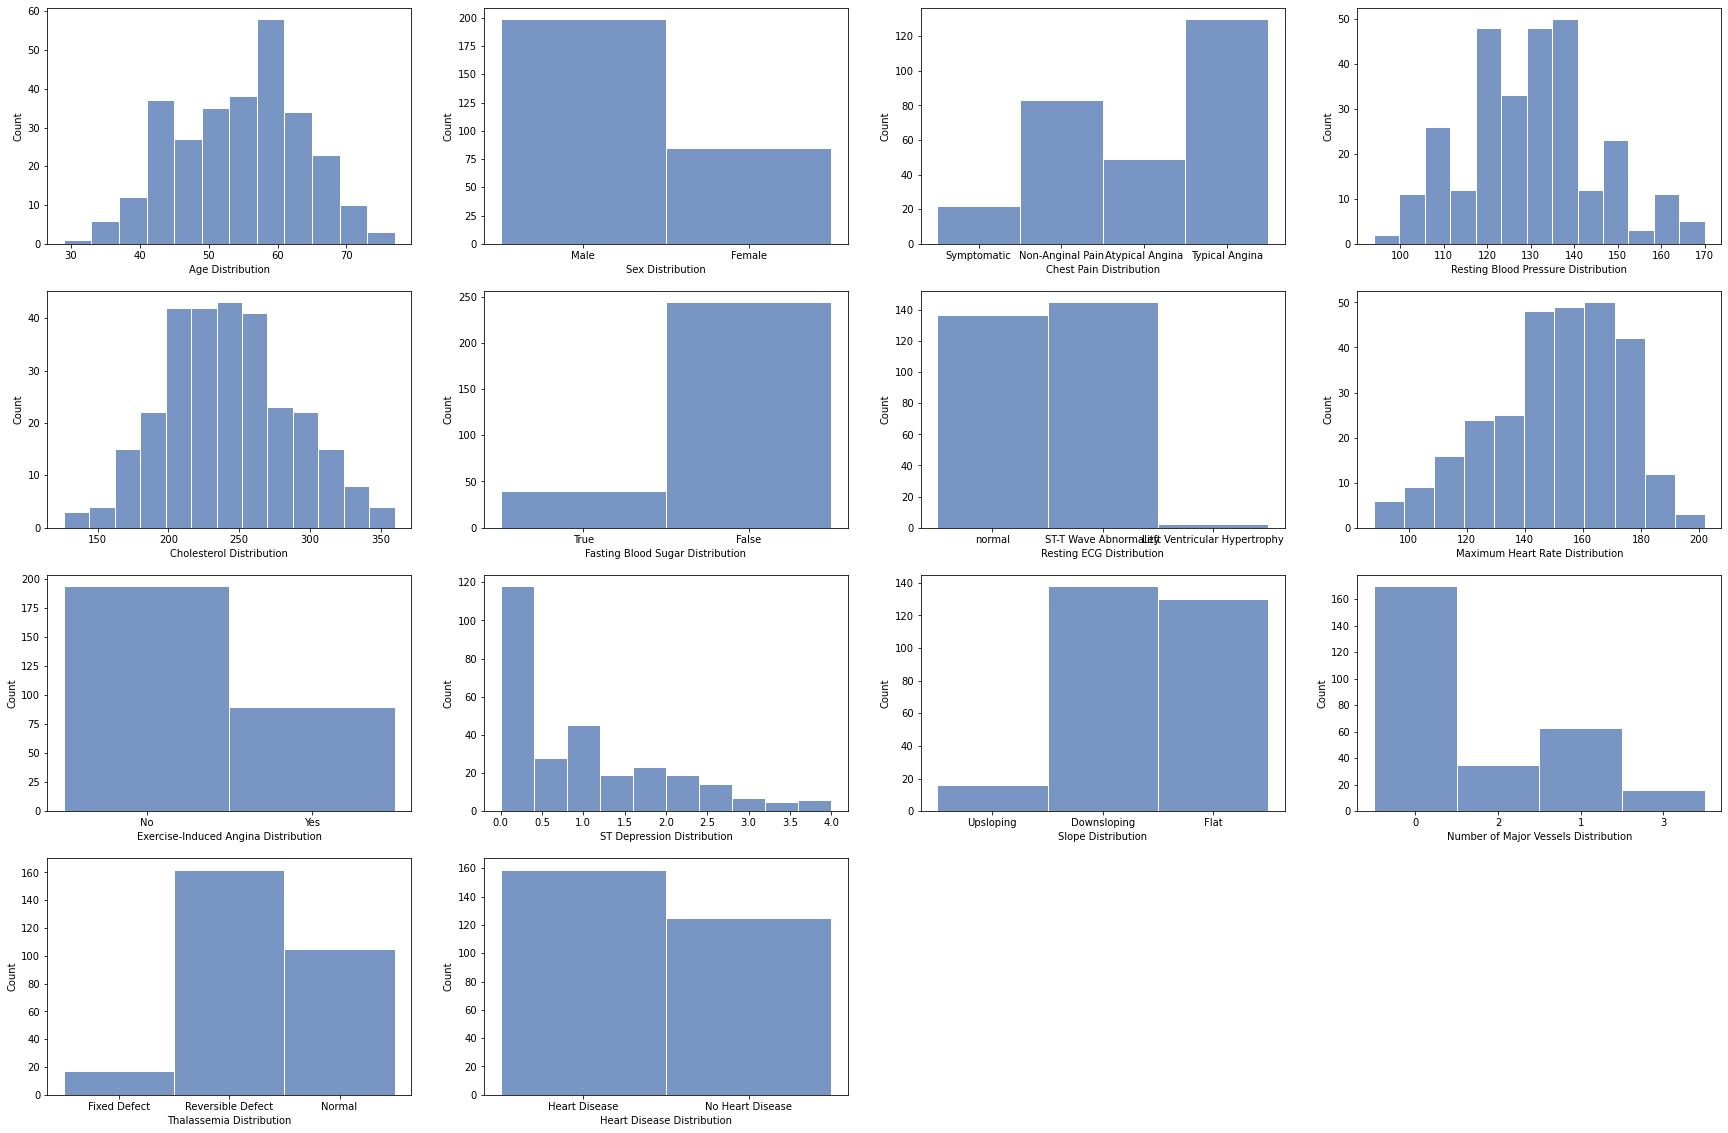

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 20))

for i, var in enumerate(df_names):
    ax = axes[int(i/4), i%4]
    sns.set(font_scale=.9)
    if var in df_visual:
        sns.histplot(data=df_visual, x=var, ax=ax)
        ax.set_xlabel(df_names[var] + ' Distribution')
    else:
        sns.histplot(data=df, x=var, ax=ax)
        ax.set_xlabel(df_names[var] + ' Distribution')

ax = axes[3, 2]
ax.axis('off')
ax = axes[3, 3]
ax.axis('off')

<h4>Conclusions</h4> 

- The age of patients is roughly normally distributed.
- There were more males included in this dataset than females.
- Typical Angina was the most common chest pain type among patients in this dataset.
- Resting blood pressure among patients is normally distributed.
- Cholesterol among patients is normally distributed.
- It was not common for patients in this dataset to have a fasting blood sugar higher than 120 mg/dl (indicator of diabetes).
- Most patients had either a normal resting ECG or an ST-T Wave Abnormality.
- The maximum heart rate of patients in this dataset are skewed left.
- Most patients in this dataset did not have Exercise-Induced Angina.
- Exercise-Induced ST Depression for patients in this dataset is skewed right.
- Most patients in this dataset had either a flat or downsloping slope of their peak exercise ST segment.
- Most patients in this dataset had 0 major vessels.
- Most patients in this dataset either had a normal or reversible defect.
- There are more patients in this dataset with a heart disease than without.

Now, let's take a look at the correlation between all these variables:

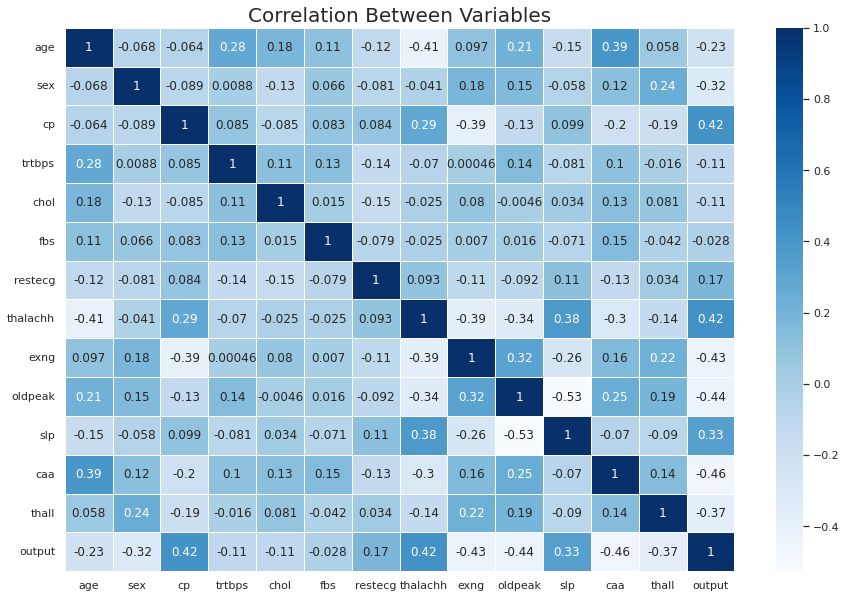

In [14]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Correlation Between Variables', fontsize = 20)
plt.show()

This correlation matrix can help us answer one of our motivating questions-- **what factors most influence the chance of heart disease?**. If we focus on only the final row in the matrix, we can see the correlation coefficients for each variable with respect to the 'output' variable. Values in this row with a darker blue background have a higher correlation with the 'output' variable, and vice versa. We can see that the highest of these coefficients represent the correlation between:

- 'cp' and 'output'
- 'restecg' and 'output'
- 'thalachh' and 'output'
- 'slp' and 'output'

From this, we can conclude that **the factors that most influence the chance of heart disease are chest pain, resting ECG, maximum heart rate, and the slope of the peak exercise ST segment.**

Next, let's visualize these factors according to whether or not each patient has heart disease and draw conclusions based off these plots. We'll first start by plotting continuous variables with regression lines to see how each variable influences heart disease:

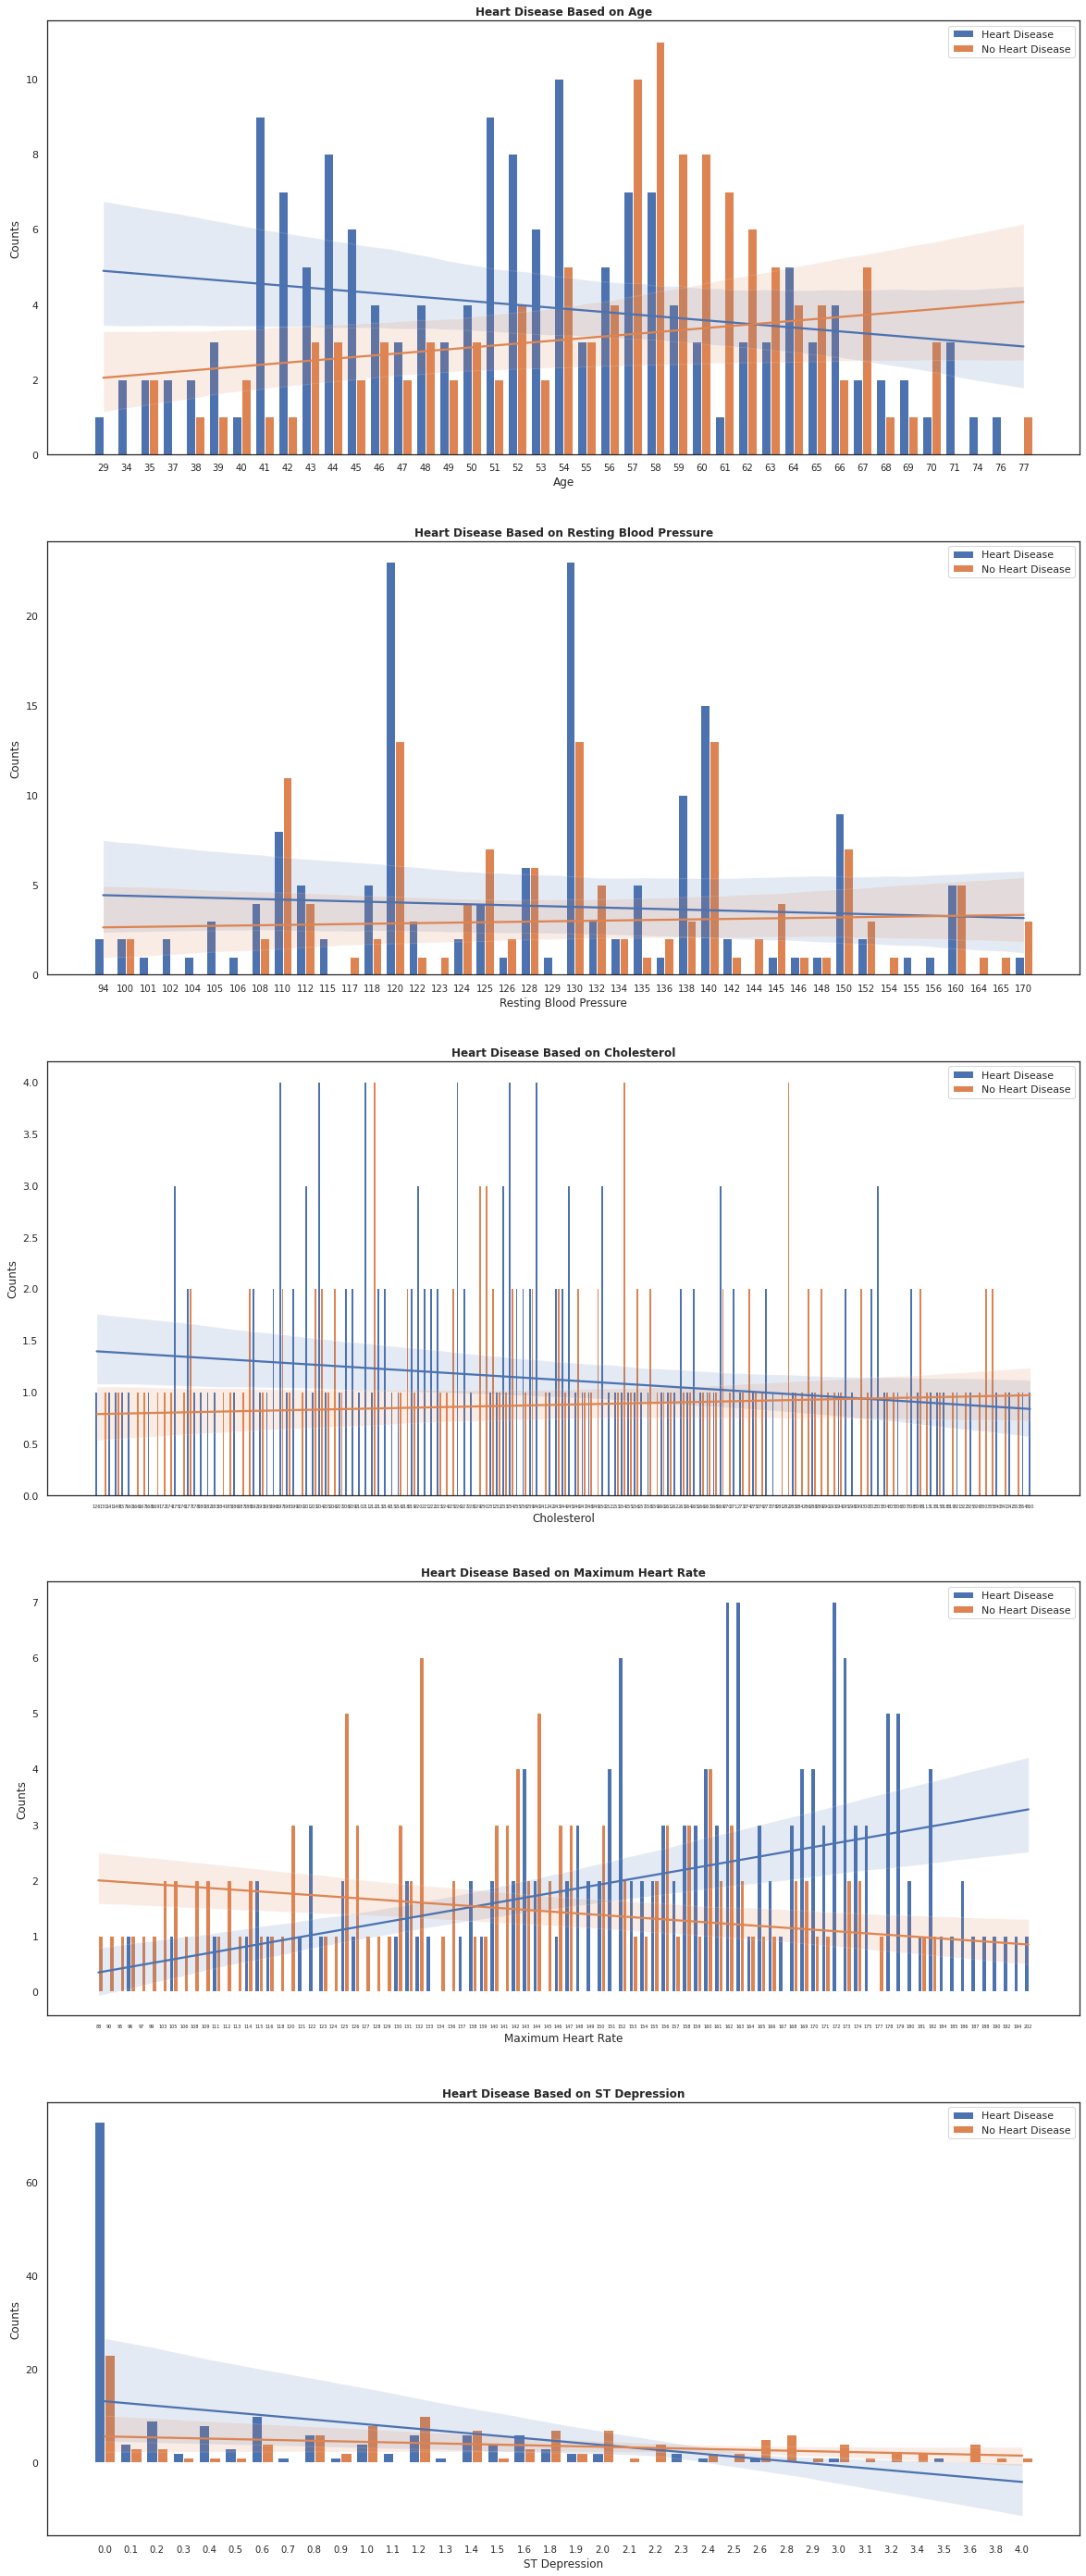

In [15]:
continous_variables = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 50))

for i, var in enumerate(continuous_variables):
    ax = axes[i]
    
    # Prepare data for plotting
    df_copy = pd.DataFrame({var: df.sort_values(by = [var])[var].unique(), 'heart disease': np.nan, 'no heart disease': np.nan})
    for var_point in df.sort_values(by = [var])[var].unique():
        idx = df_copy.index[df_copy[var] == var_point]
        num_heart_diseases = len(df.loc[(df[var] == var_point) & (df['output'] == 1)]['output'])
        num_no_heart_diseases = len(df.loc[(df[var] == var_point) & (df['output'] == 0)]['output'])
        df_copy.loc[idx, 'heart disease'] = num_heart_diseases
        df_copy.loc[idx, 'no heart disease'] = num_no_heart_diseases

    # Plot data
    labels = df_copy[var]
    x = np.arange(len(labels))
    width = 0.4
    
    bar1 = ax.bar(x - width/2, df_copy['heart disease'], width, label="Heart Disease")
    bar2 = ax.bar(x + width/2, df_copy['no heart disease'], width, label="No Heart Disease")

    # Plot regression lines
    sns.regplot(x=df_copy.index, y='heart disease', data=df_copy, ax=ax, scatter_kws={'s': 0})
    sns.regplot(x=df_copy.index, y='no heart disease', data=df_copy, ax=ax, scatter_kws={'s': 0})

    ax.set_ylabel("Counts")
    ax.set_title("Heart Disease Based on " + df_names[var], weight='bold')
    ax.set_xlabel(df_names[var])
    if var == 'chol' or var == 'thalachh':
        ax.set_xticks(x, labels, fontsize=5)
    else:
        ax.set_xticks(x, labels, fontsize=10)
    ax.legend()


<h4>Conclusions</h4>

- According to this sample of data, the older a patient was, the less likely it was for them to have heart disease.
- According to this sample of data, the higher a patient's resting blood pressure was, the less likely it was for them to have heart disease.
- According to this sample of data, the higher a patient's cholesterol was, the less likely it was for them to have heart disease.
- According to this sample of data, the higher a patient's maximum heart rate was, the more likely it was for them to have heart disease.
- According to this sample of data, the longer a patient's exercise-induced ST depression segment was, the less likely it was for them to have heart disease.

Next, let's visualize continuous variable distributions together according to whether or not the patient had heart disease:

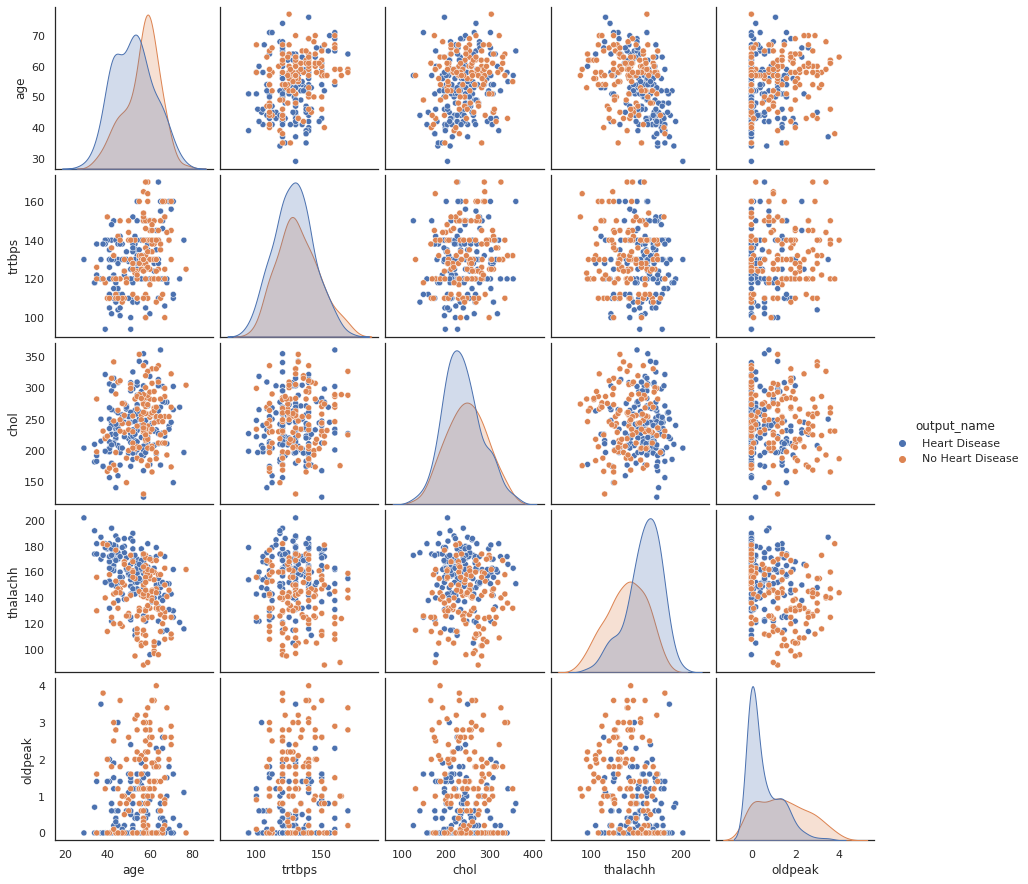

In [16]:
continuous_variables = ["age","trtbps","chol","thalachh","oldpeak"]
sns.pairplot(df[continuous_variables + ['output_name']], hue='output_name')

Next, we'll plot the categorical variables, split with respect to 'output' to see how each of these variables influences heart disease:

(0.0, 1.0, 0.0, 1.0)

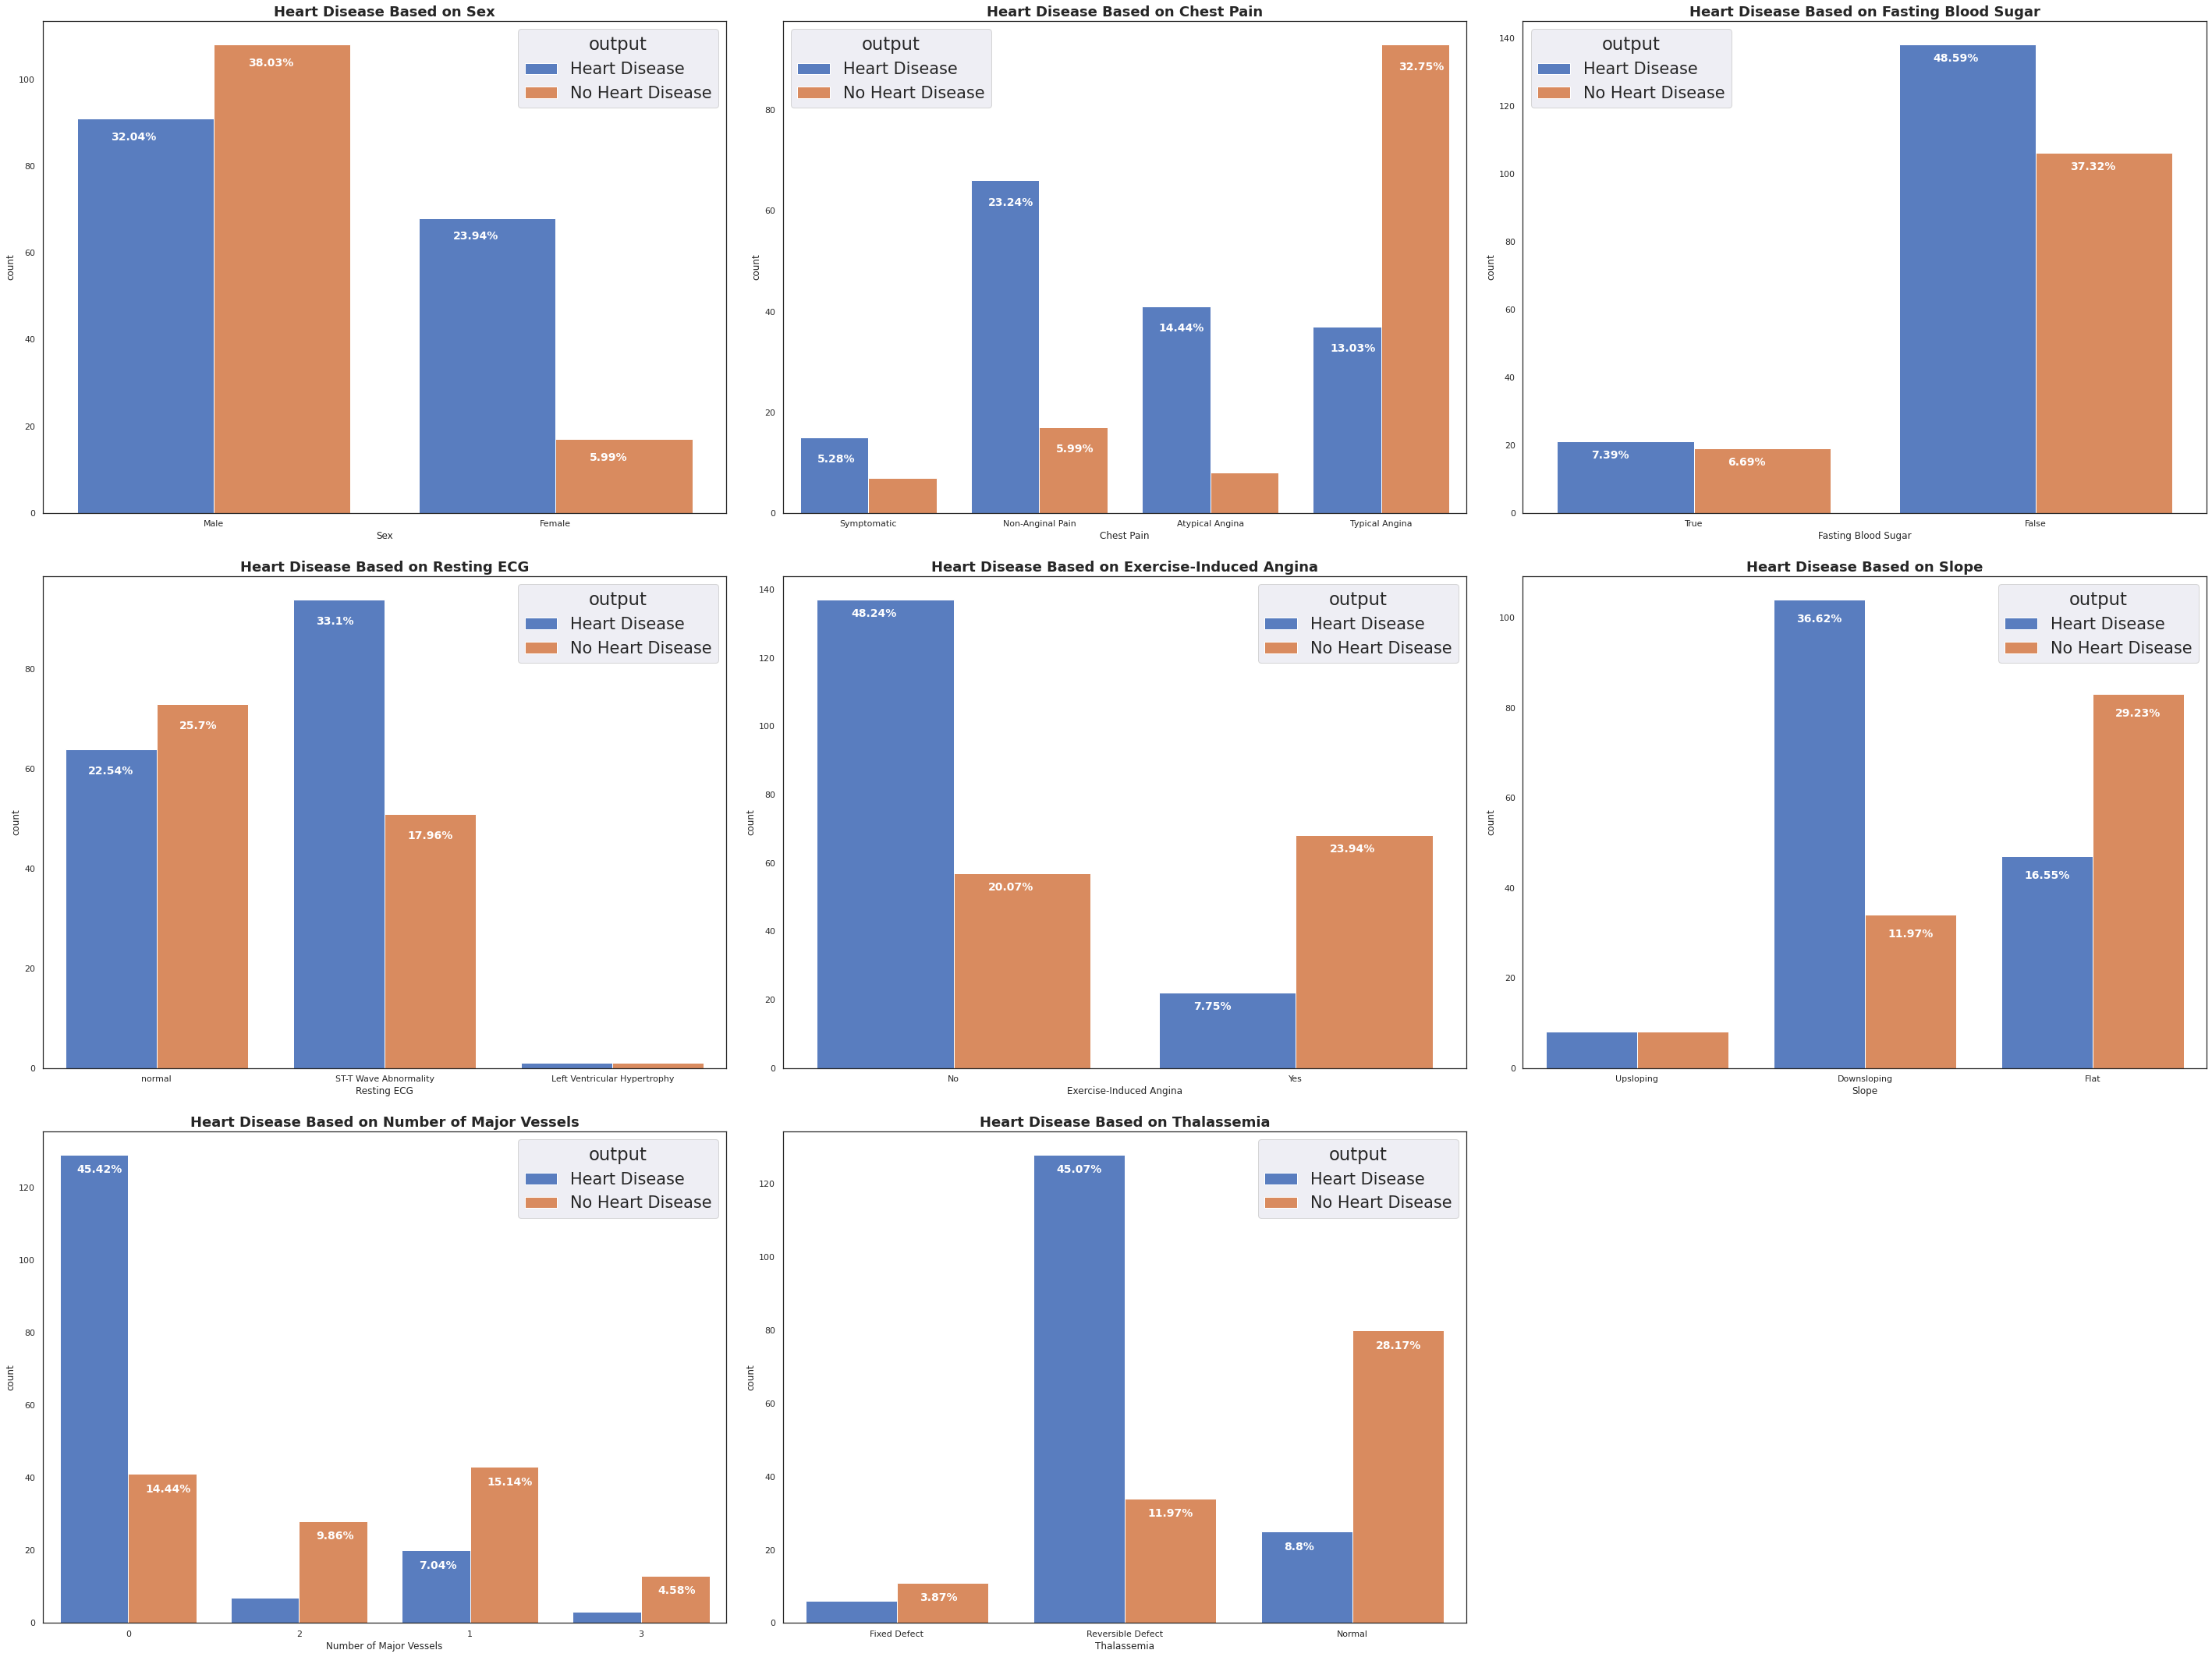

In [17]:
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 30))

for i, var in enumerate(categorical_variables):
    ax = axes[int(i/3), i%3]
    
    name = df_visual[var]
    sns.set(font_scale=1.9)
    sns.countplot(x=var, hue='output', data=df_visual, palette='muted', ax=ax)
    ax.set_title("Heart Disease Based on " + df_names[var], fontsize = 18, weight = 'bold')
    ax.set_xlabel(df_names[var])

    # Calculate percentages
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
        if i.get_height() > 10:
            ax.text(i.get_x()+.1, i.get_height()-5,
                    str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                        color='white', weight = 'bold')  
    plt.tight_layout()

ax = axes[2, 2]
ax.axis('off')

<h4>Conclusions</h4>

- Among diseased patients, there are more males than females.
- Among healthy patients, many experience chest pain, likely due to external factors such as stress levels, gender, and physical activities, and among diseased patients, a majority experience non-anginal pain.
- Most patients with and without heart disease do not have a fasting blood sugar higher than 120 mg/dl (indicator of Diabetes) which indicates that this may not be a strong feature for differentiation between patients with and without heart disease.
- Among patients with heart disease, the majority had an ST-T Wave Abnormality.
- Among patients with heart disease, the majority did not have exercise-induced angina.
- Among the patients with heart disease, a majority had a downsloping slope for the peak of their exercise ST segment.
- Among patients with heart disease, a majority had 0 major vessels.
- Among patients with heart disease, a majority had a reversible defect.

Lastly, let's look at the distribution of categorical variables only for patients with heart disease, split between males and females, which will give us insights that will be useful in answering our motivating question in the following section:

(0.0, 1.0, 0.0, 1.0)

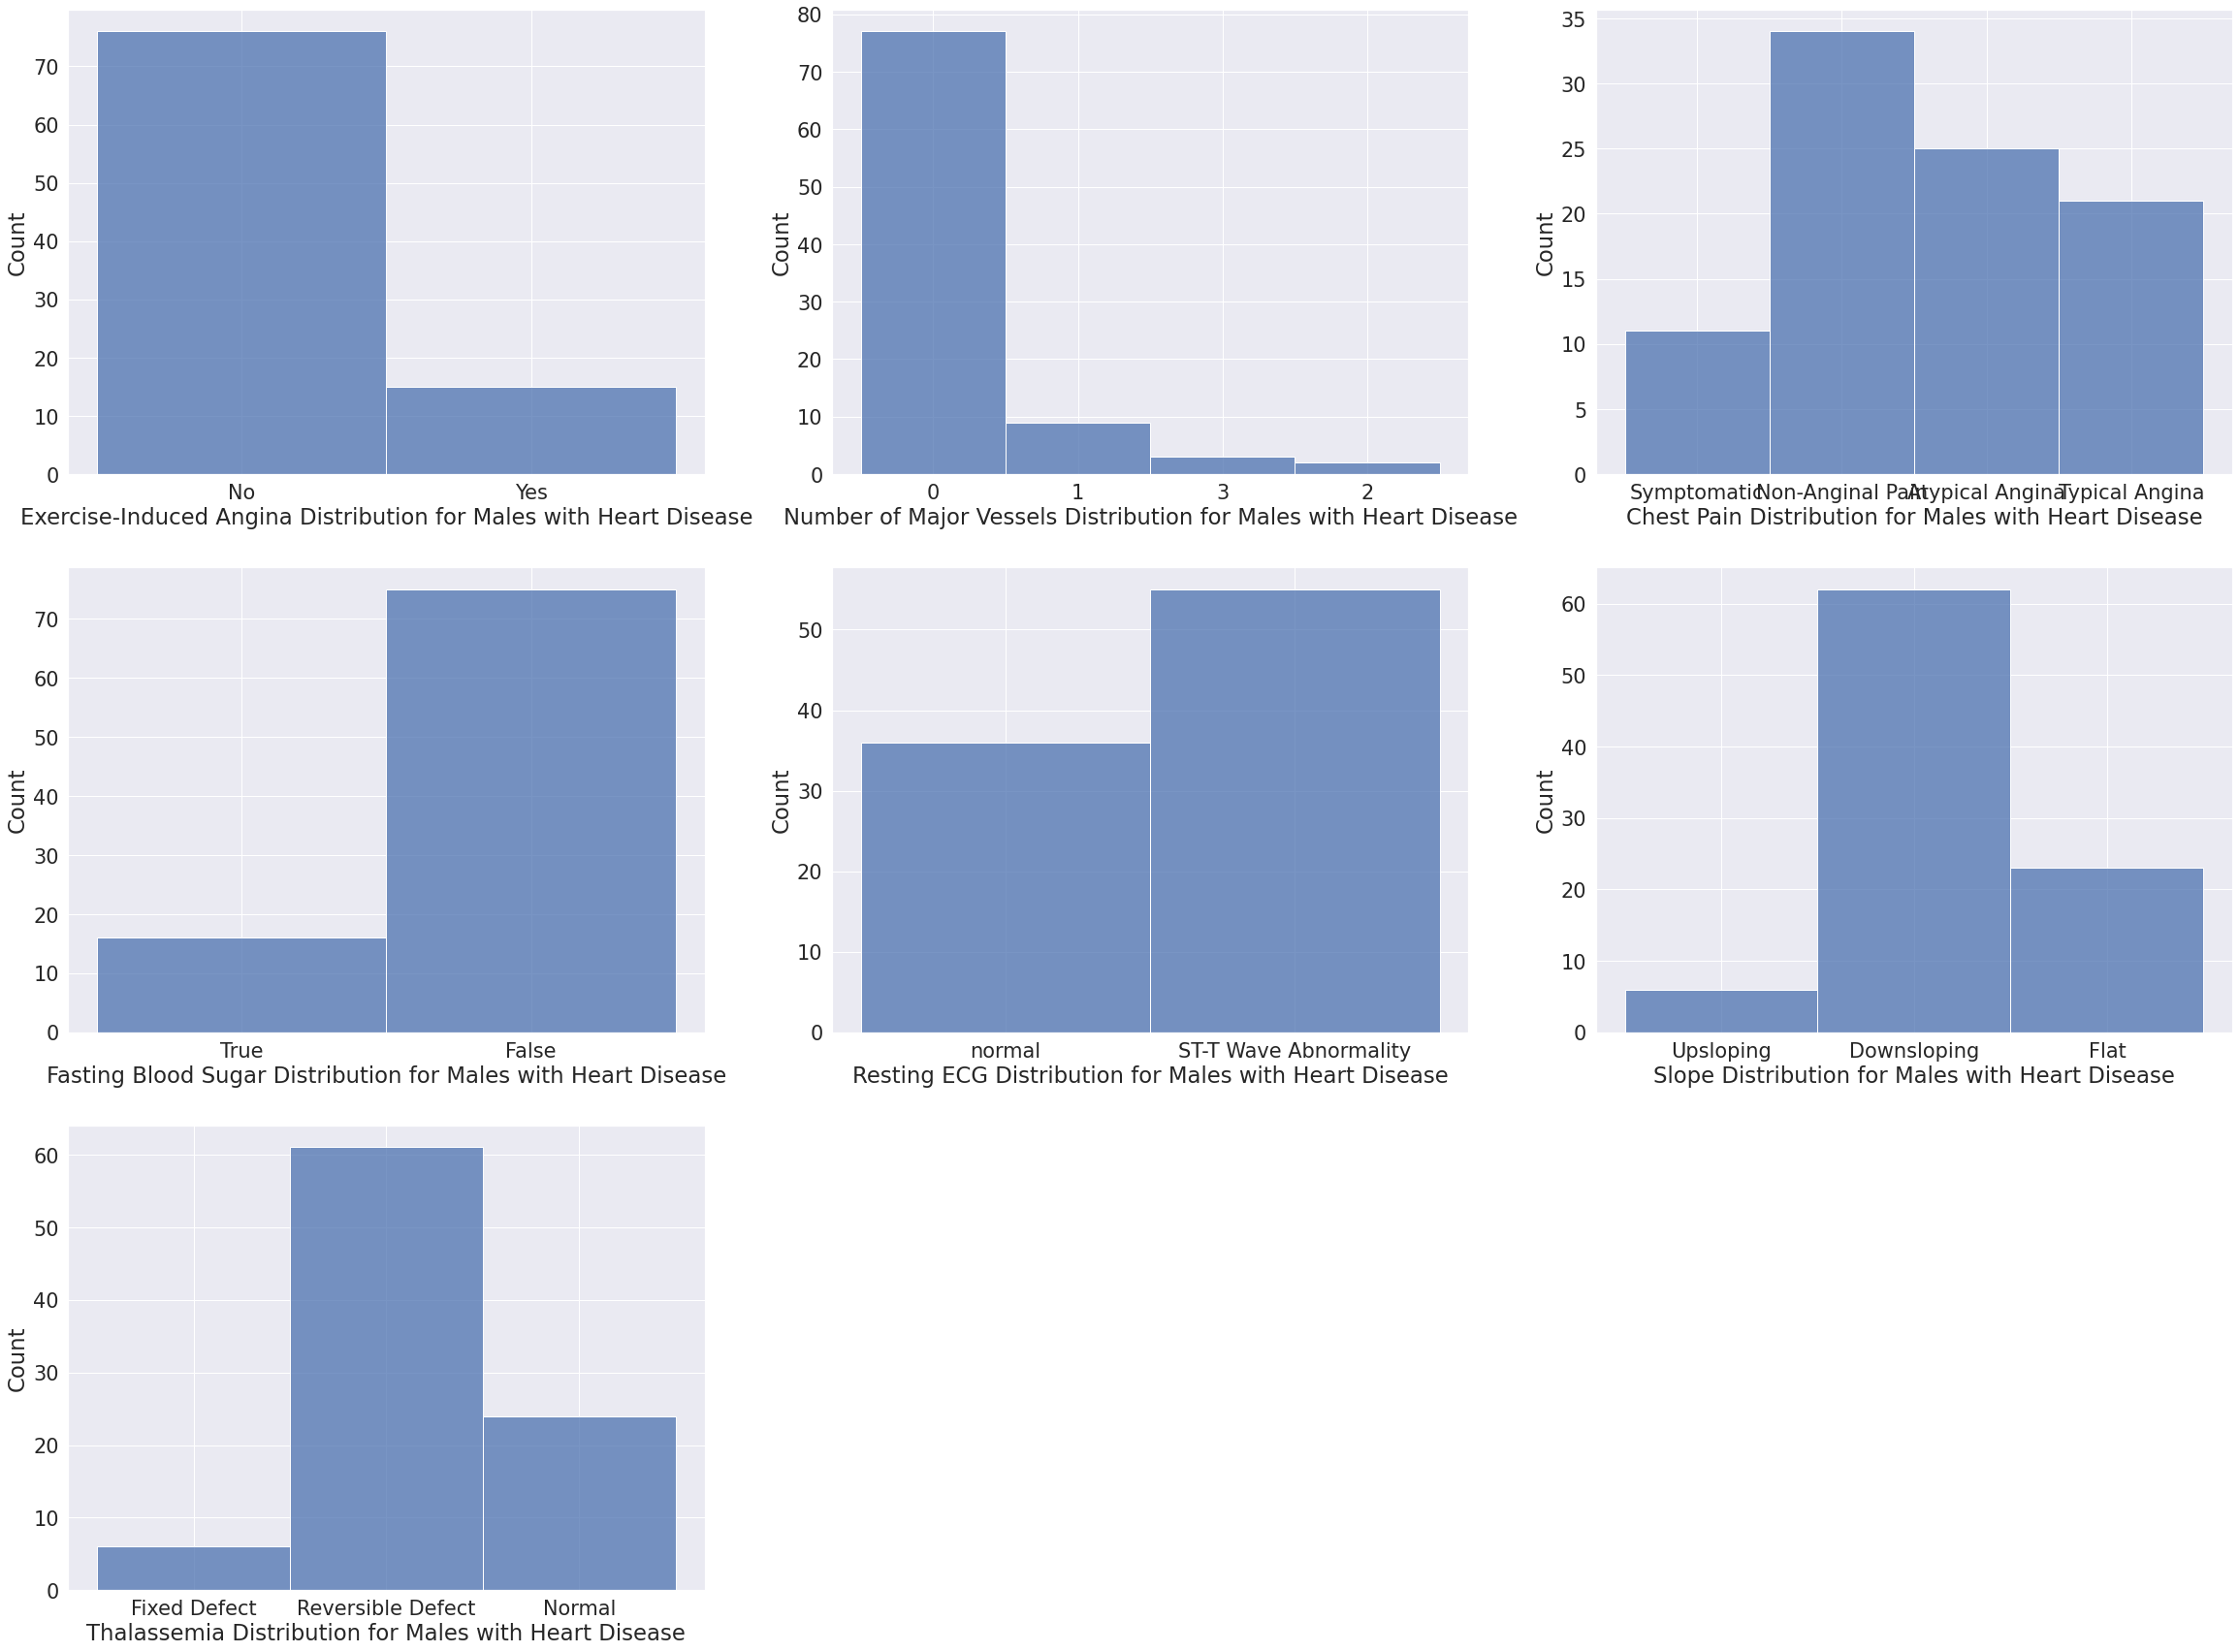

In [18]:
# Visualize distributions for males with heart disease

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 30))
categorical_variables = ['exng','caa','cp','fbs','restecg','slp','thall']

for i, var in enumerate(categorical_variables):
    ax = axes[int(i/3), i%3]
    sns.set(font_scale=1.25)
    sns.histplot(data=df_visual[(df_visual['output'] == 'Heart Disease') & (df_visual['sex'] == 'Male')], x=var, ax=ax)
    ax.set_xlabel(df_names[var] + " Distribution for Males with Heart Disease")
    
ax = axes[2, 1]
ax.axis('off')
ax = axes[2, 2]
ax.axis('off')

(0.0, 1.0, 0.0, 1.0)

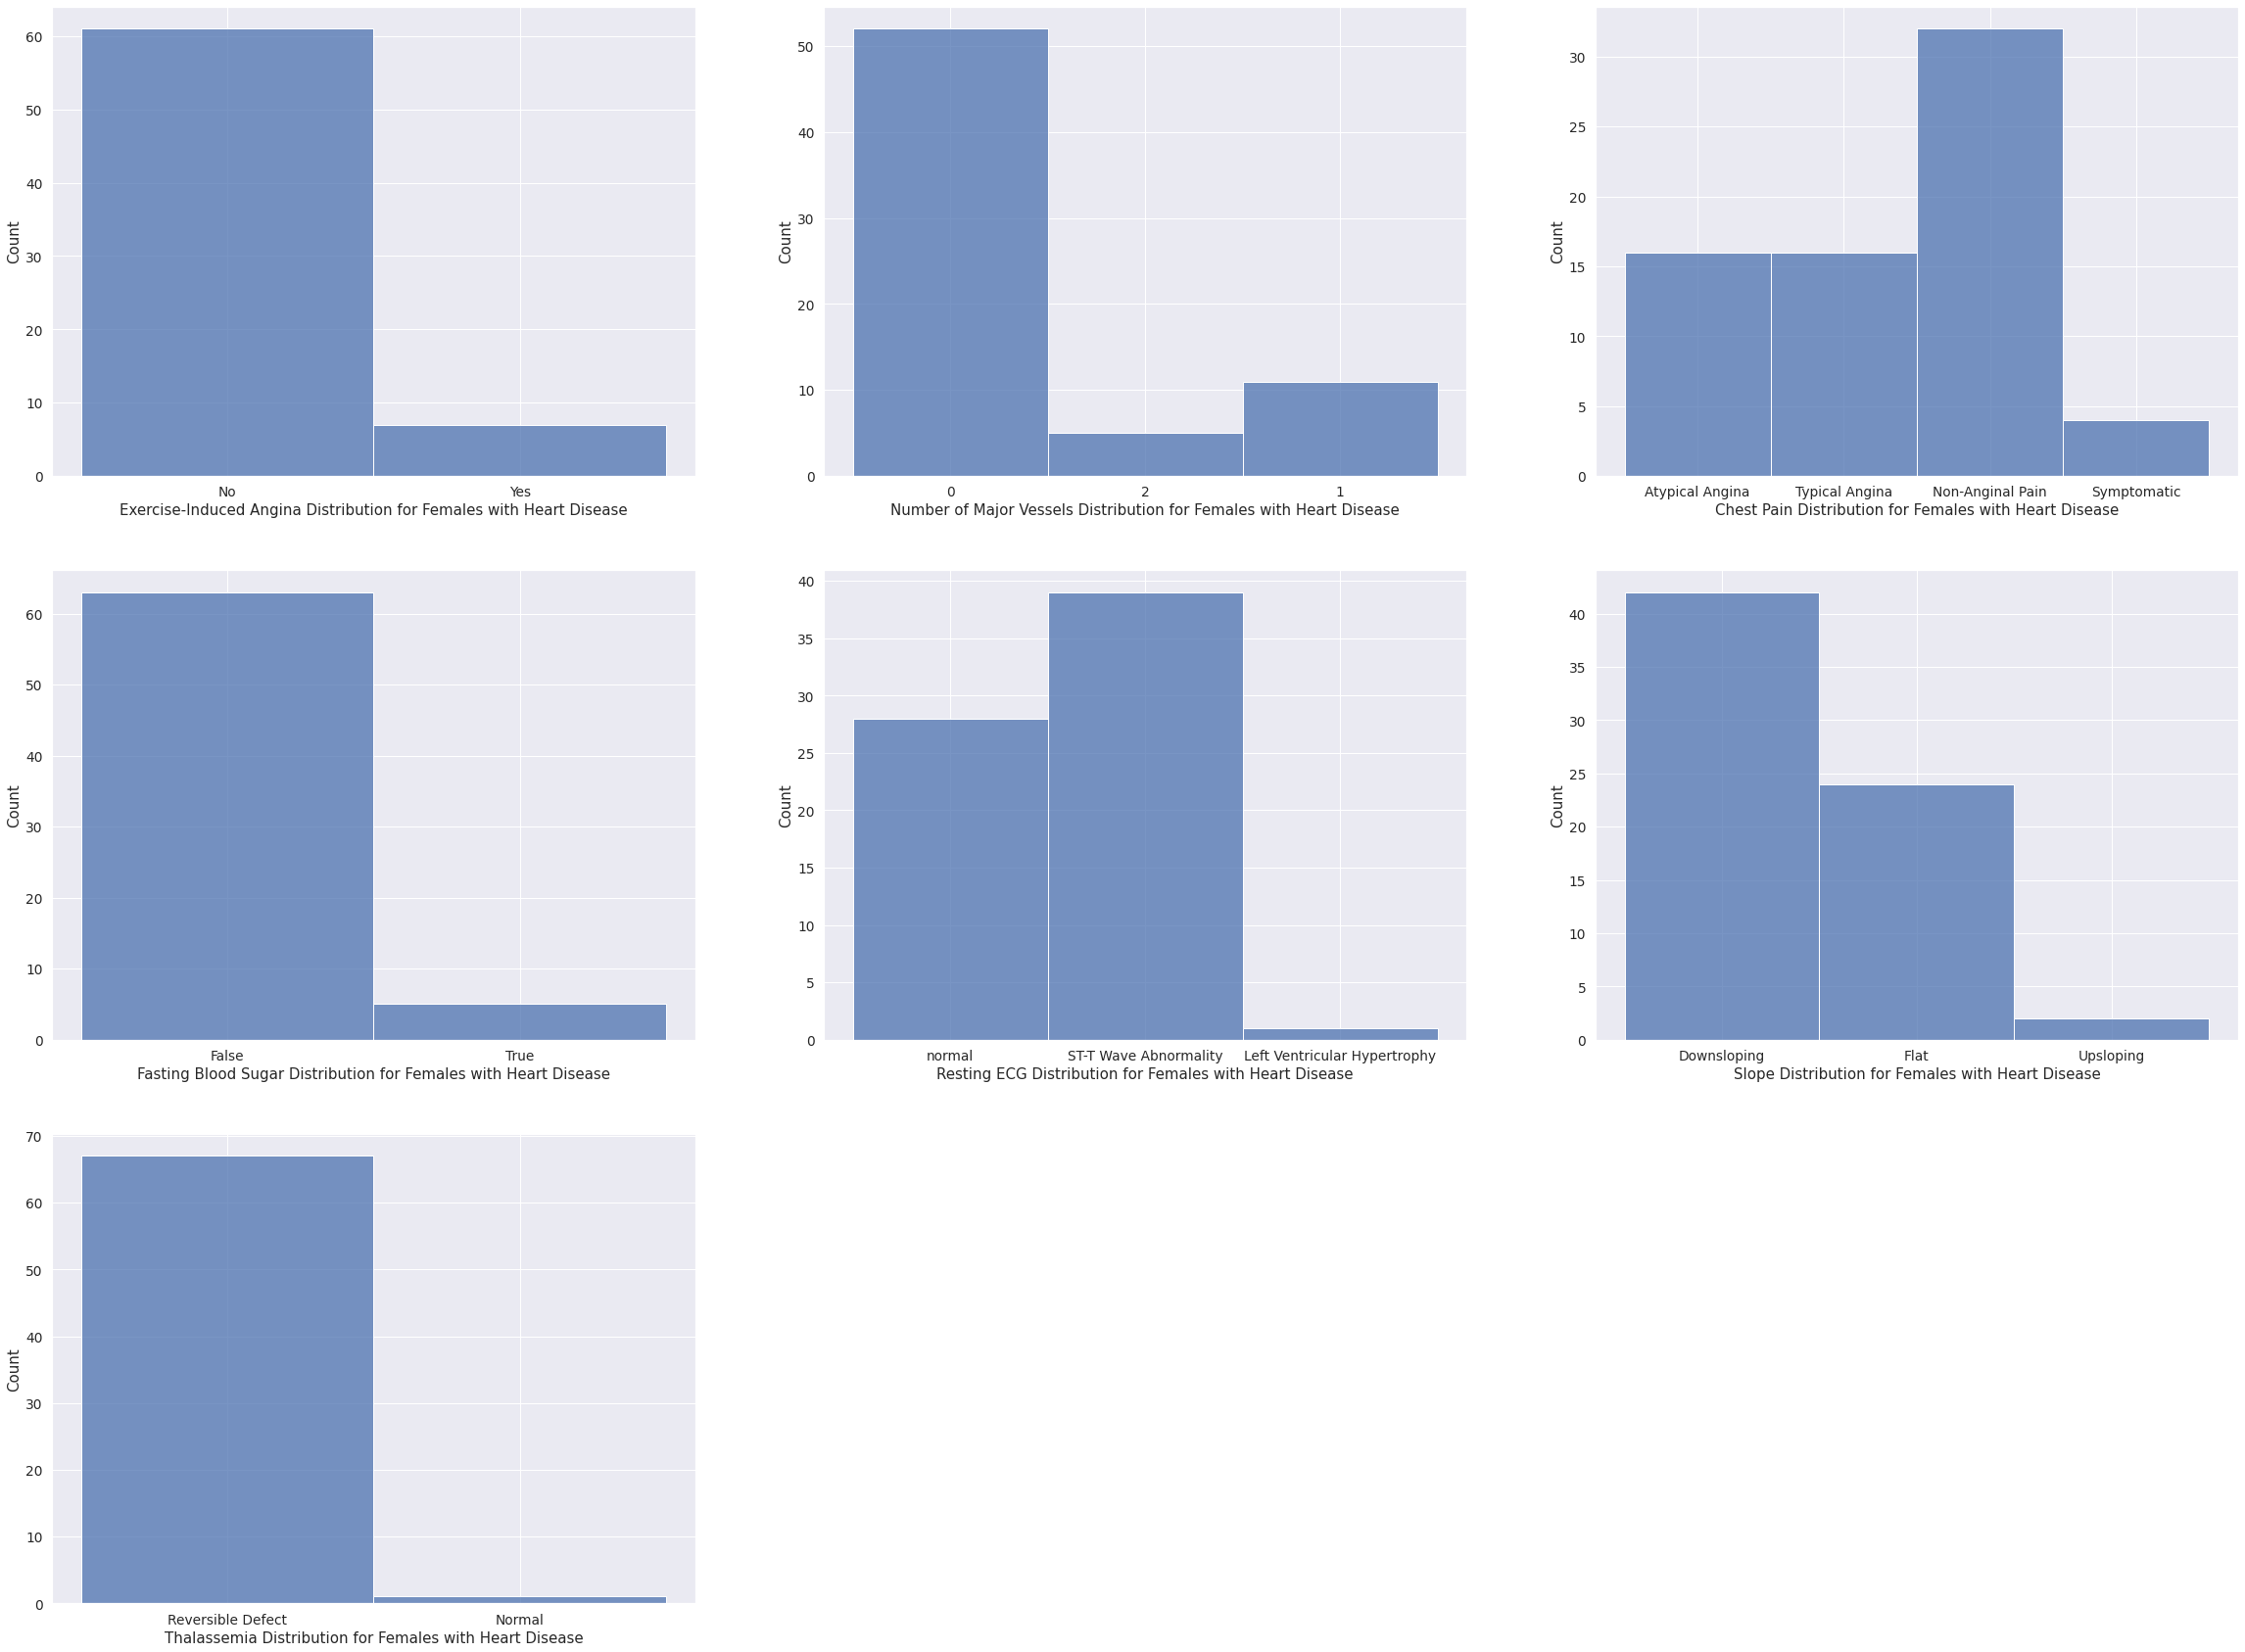

In [19]:
# Visualize distributions for males with heart disease

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 30))
categorical_variables = ['exng','caa','cp','fbs','restecg','slp','thall']

for i, var in enumerate(categorical_variables):
    ax = axes[int(i/3), i%3]
    sns.set(font_scale=1.25)
    sns.histplot(data=df_visual[(df_visual['output'] == 'Heart Disease') & (df_visual['sex'] == 'Female')], x=var, ax=ax)
    ax.set_xlabel(df_names[var] + " Distribution for Females with Heart Disease")
    
ax = axes[2, 1]
ax.axis('off')
ax = axes[2, 2]
ax.axis('off')

---

<h2>Inferential Statistics</h2>

In this section, we want to use insights gained about categorical variables from our exploratory data analysis in combination with inferential statistics on continuous variables to build a kind of 'health profile' that answers our second motivating question-- **what demographic and health profiles are most prone to heart disease?**. For each categorical variable, we will identify the type that is most common amongst diseased patients for males and females based on the plots. For each continuous variable, we will establish a 95% confidence interval that provides a range of average values amongst diseased patients. Using this information, we will build a profile for the males and females most prone to heart disease.

We start by calculating and collecting the information for males and females:

In [20]:
male_data = []
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['age']).zconfint_mean())
male_data.append('Non-Anginal Pain')
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['trtbps']).zconfint_mean())
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['chol']).zconfint_mean())
male_data.append('<= 120 mg/dl')
male_data.append('ST-T Wave Abnormality')
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['thalachh']).zconfint_mean())
male_data.append('No')
male_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 1)]['oldpeak']).zconfint_mean())
male_data.append('Downsloping')
male_data.append('0')
male_data.append('Normal')

female_data = []
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['age']).zconfint_mean())
female_data.append('Non-Anginal Pain')
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['trtbps']).zconfint_mean())
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['chol']).zconfint_mean())
female_data.append('<= 120 mg/dl')
female_data.append('ST-T Wave Abnormality')
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['thalachh']).zconfint_mean())
female_data.append('No')
female_data.append(statsmodels.stats.weightstats.DescrStatsW(df[(df['output'] == 1) & (df['sex'] == 0)]['oldpeak']).zconfint_mean())
female_data.append('Downsloping')
female_data.append('0')
female_data.append('Normal')

Now that we've collected all the necessary information, we can assemble a demographic and health profile for the most prone individual to a heart attack:

(0.0, 3.5, -1.0, 12.0)

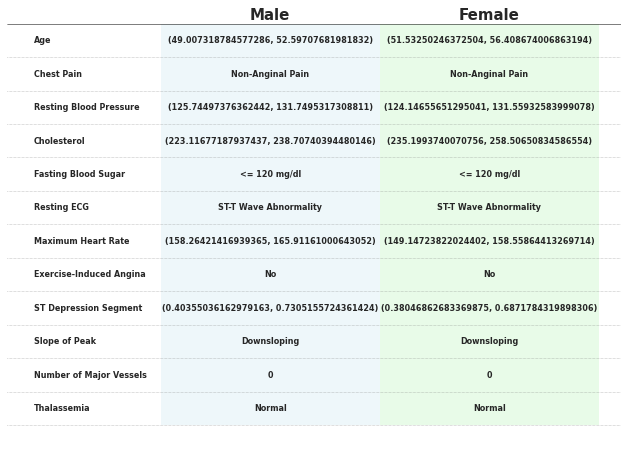

In [21]:
rows = ['Age', 'Chest Pain', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Maximum Heart Rate', 'Exercise-Induced Angina', 'ST Depression Segment', 'Slope of Peak', 'Number of Major Vessels', 'Thalassemia']
cols = ['Male', 'Female']

fig, ax = plt.subplots(figsize=(11, 8))
ax.set_ylim(-1, 12)
ax.set_xlim(0, 3.5)
ax.text(x=1.5, y=11.75, s='Male', va='center', ha='center', weight='bold')
ax.text(x=2.75, y=11.75, s='Female', va='center', ha='center', weight='bold')

for i, row in enumerate(reversed(rows)):
   ax.text(x=.15, y=i, s=row, va='center', ha='left', fontsize=8, weight='bold')
   
for i, row in enumerate(reversed(male_data)):
   ax.text(x=1.5, y=i, s=row, va='center', ha='center', fontsize=8, weight='bold')
   
for i, row in enumerate(reversed(female_data)):
   ax.text(x=2.75, y=i, s=row, va='center', ha='center', fontsize=8, weight='bold')

for i, row in enumerate(rows):
    ax.plot(
    	[0, 4],
    	[i -.5, i - .5],
    	ls=':',
    	lw='.5',
    	c='grey'
    )
    
ax.plot([0, 4], [11.5, 11.5], lw='.5', c='black')

male_bg = matplotlib.patches.Rectangle(
   (.875, -.5), 1.25, 12, ec='none', fc='lightblue', alpha=.2, zorder=-1 
)

female_bg = matplotlib.patches.Rectangle(
   (2.125, -.5), 1.25, 12, ec='none', fc='lightgreen', alpha=.2, zorder=-1 
)

ax.add_patch(male_bg)
ax.add_patch(female_bg)
ax.axis('off')

From this, we can conclude that **males with the following characteristics are most prone to heart disease:** 

- around 51 years old
- non-anginal pain
- a resting blood pressure of around 129 mm/hg
- cholesterol levels of around 231 mg/dl
- fasting blood sugar less than or equal to 120 mg/dl
- an ST-T wave abnormality
- a maximum heart rate of around 162 bpm
- no exercise-induced angina
- ST depression segment close to 0
- a downsloping peak exercise ST segment
- 0 major vessels
- no Thalassemia

And we can also conclude that **females with the following characteristics are most prone to heart disease:** 

- around 54 years old
- non-anginal pain
- a resting blood pressure of around 127 mm/hg
- cholesterol levels of around 247 mg/dl
- fasting blood sugar less than or equal to 120 mg/dl
- an ST-T wave abnormality
- a maximum heart rate of around 154 bpm
- no exercise-induced angina
- ST depression segment close to 0
- a downsloping peak exercise ST segment
- 0 major vessels
- no Thalassemia

---

<h2>Predicting Heart Disease</h2>

Below we created bins to highlight certain variables and their differences

Binning: we are essentially creating 'bins' 

This shows the binning of 3 major age groups

<AxesSubplot:xlabel='age_bins', ylabel='Count'>

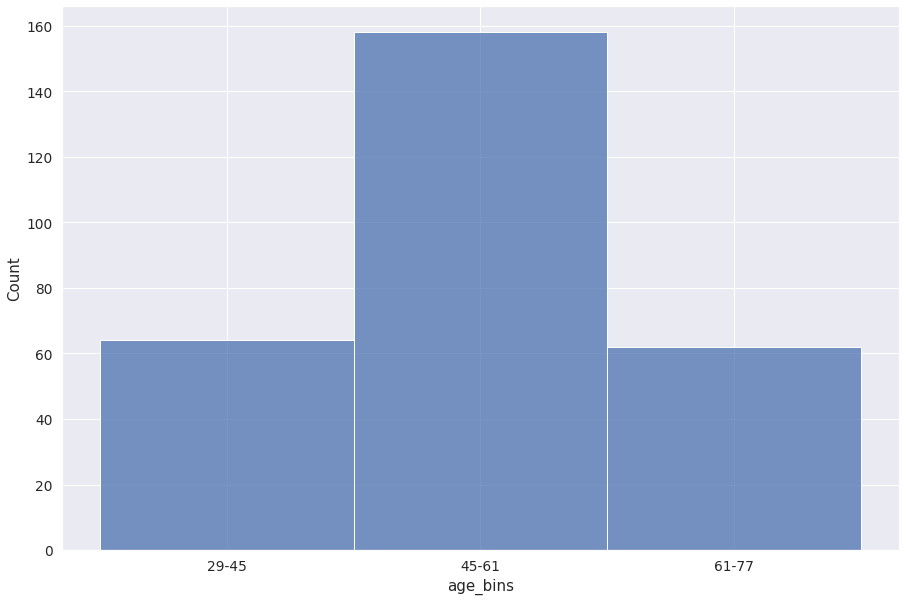

In [22]:
min_value = df['age'].min()
max_value = df['age'].max() 
bins = np.linspace(min_value,max_value,4)
labels = ['29-45', '45-61','61-77']
df['age_bins'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
sns.histplot(df['age_bins'], bins=3)

## Taking a look at the 4 different chest pains:
- asymptomatic (largest bin)
- typical angina 
- atypical angina
- non anginal (smallest bin)

Angina is a type of chest pain that is caused by reduced blood flow to the heart.

Asymptomatic is a type of chest pain that doesn't fall under the usual anginal equivalents. 

<AxesSubplot:xlabel='cp_bins', ylabel='Count'>

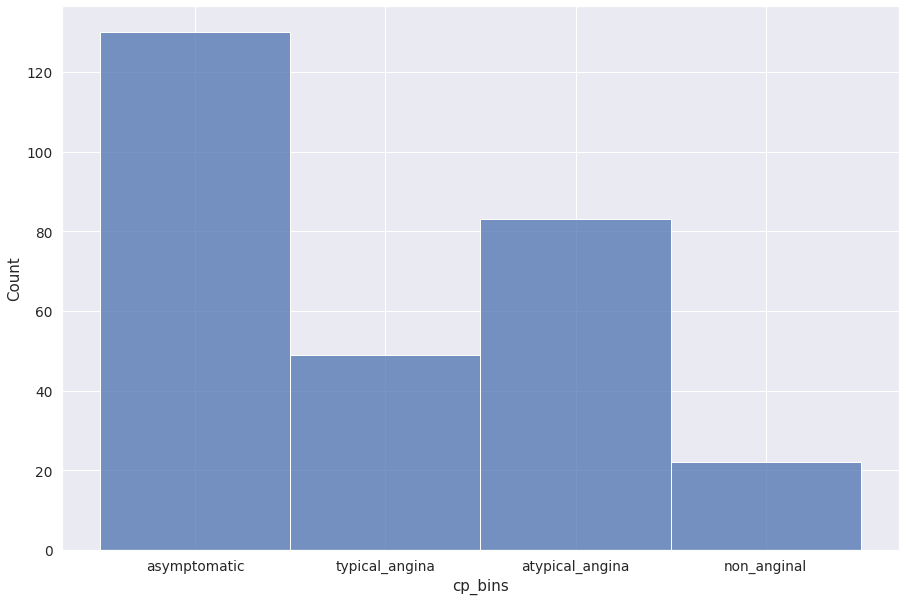

In [23]:
min_value = df['cp'].min()
max_value = df['cp'].max() 
bins = np.linspace(min_value,max_value,5)
labels = ['asymptomatic', 'typical_angina','atypical_angina', 'non_anginal']
df['cp_bins'] = pd.cut(df['cp'], bins=bins, labels=labels, include_lowest=True)
sns.histplot(df['cp_bins'], bins=3)

Here, we're creating a classifier that will be looking into the following characteristics:
- males
- asymptomatic 
- age
- cholesterol

These are some of the factors that can cause heart-attacks, in particular, they're some of the variables that are known to Jason that could have played a role in his father's heart-attack. We want to investigate how accurately this generic male be classified in whether they did or did not have a heart-attack.

We create a copy of our original dataframe that we're going to use and expand upon build for our classifier.

First we assign a variable name to our chest pain's numeric value. This will better make sense of the numbers later when we decide on classifier variables. The assignment of what each number represents can be found in the link description at the top.

In [24]:
# putting a name to chest pain to get dummy columns
classify = df.copy()
for index, row in classify.iterrows():
    if row['cp'] == 1:
        classify.at[index,'cp'] = 'typical_angina'
    elif row['cp'] == 2:
        classify.at[index, 'cp'] = 'atypical_angina'
    elif row['cp'] == 3:
        classify.at[index, 'cp'] = 'non_anginal'
    elif row['cp'] == 0:
        classify.at[index, 'cp'] = 'asymptomatic'
    

Next, we are going to take our sex numeric value and turn into data that makes sense to us. A male is designated by a 1, so we're going to then assign it as 'male'. Similarly, 0 with 'female'.

In [25]:
# putting a name to sex to get dummy columns
for index, row in classify.iterrows():
    if row['sex'] == 1:
        classify.at[index,'sex'] = 'male'
    elif row['sex'] == 0:
        classify.at[index, 'sex'] = 'female'
classify

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,output_name,age_bins,cp_bins
0,63,male,non_anginal,145,233,1,0,150,0,2.3,0,0.0,1.0,1,Heart Disease,61-77,non_anginal
1,37,male,atypical_angina,130,250,0,1,187,0,3.5,0,0.0,2.0,1,Heart Disease,29-45,atypical_angina
2,41,female,typical_angina,130,204,0,0,172,0,1.4,2,0.0,2.0,1,Heart Disease,29-45,typical_angina
3,56,male,typical_angina,120,236,0,1,178,0,0.8,2,0.0,2.0,1,Heart Disease,45-61,typical_angina
4,57,female,asymptomatic,120,354,0,1,163,1,0.6,2,0.0,2.0,1,Heart Disease,45-61,asymptomatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,asymptomatic,140,241,0,1,123,1,0.2,1,0.0,3.0,0,No Heart Disease,45-61,asymptomatic
299,45,male,non_anginal,110,264,0,1,132,0,1.2,1,0.0,3.0,0,No Heart Disease,29-45,non_anginal
300,68,male,asymptomatic,144,193,1,1,141,0,3.4,1,2.0,3.0,0,No Heart Disease,61-77,asymptomatic
301,57,male,asymptomatic,130,131,0,1,115,1,1.2,1,1.0,3.0,0,No Heart Disease,45-61,asymptomatic


We start planning out the libraries that will be used for our classifier, we're going to take a look at the following important metrics, functions, and concepts:
- Receiver Operating Characteristic (ROC)
- Decision Tree Classifier
- Train/Test split
- Confusion Matrix
- Accuracy Score

In [26]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score)

Here, we're trying to create binary columns for each of the characteristics we mentioned above. Now, male will be its own column, with a 1 or 0 symbolizing true or false depending on if the person is male. Similarly, we're breaking up the 4 different types of chest-pain, along with the binary variable of being either 'Heart Disease' or 'No Heart Disease'.

In [27]:
dummies = pd.get_dummies(classify['sex'])
classify = pd.concat([classify, dummies], axis = 1)
dummies = pd.get_dummies(classify['cp'])
classify = pd.concat([classify, dummies], axis = 1)
dummies = pd.get_dummies(classify['output_name'])
classify = pd.concat([classify, dummies], axis = 1)
classify.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'output_name',
       'age_bins', 'cp_bins', 'female', 'male', 'asymptomatic',
       'atypical_angina', 'non_anginal', 'typical_angina', 'Heart Disease',
       'No Heart Disease'],
      dtype='object')

<h2> Classifiers </h2>

<h4> Test/Train </h4>

We're going to use a 80/20 split which is fairly common, we're saying train our classifier on 80% of our data and reserve the 20% of our data to be the test of how we trained it. The random state is just basically a 'seed' that if you wanted to reproduce these results but still have a randomness factor, use this seed. The number 42 is a bit of an inside joke that comes from the Hitchhiker's Guide to the Galaxy written by Douglas Adams. It is still just a seed.

In [28]:
train, test = train_test_split(classify, test_size = 0.2, stratify = classify['output'], random_state = 42)

These are the feature names we're going to look at. Building a classifier based off a person that was asymptomatic and male, while allowing their age and cholestral's values determine and help build the classifier. We are going to compare these to our class name, or our 'output' which is just whether or not they had heart disease, which is what we're measuring. 

In [29]:
# looking at males within a certain age 
fn = ['male', 'age', 'asymptomatic', 'chol']
cn = ['output']

We train/test our features on our x variables, the variables we're investigating. We train/test our class on our y variables. 

In [30]:
X_train = train[fn]
y_train = train[cn]
X_test = test[fn]
y_test = test[cn]

<h4> Logistic Regression </h4>

Let's take a look at the logistic regression model based on the training data. The logistic regression is essentially using the sigmoid and natural logarithm function to compare predicted responses to actual responses.

We can see a summary of our model below that highlights key aspects to take into consideration in assessing our classifier. For example our pseudo r-squared value is 0.1590, this is a number between 0 and 1 and can help determine if these variables will create a good fit. R-squared statistic can be artificially inflated by adding any independent variable to the model. We can also see the coefficients of each variable and is what ultimately helped build our fit.

In [31]:
LogisticModel = sm.Logit(y_train, X_train).fit()
print(LogisticModel.summary())

Optimization terminated successfully.
         Current function value: 0.576975
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                            3
Date:                Sat, 17 Dec 2022   Pseudo R-squ.:                  0.1590
Time:                        03:48:21   Log-Likelihood:                -130.97
converged:                       True   LL-Null:                       -155.73
Covariance Type:            nonrobust   LLR p-value:                 1.009e-10
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
male            -0.8026      0.330     -2.430      0.015      -1.450      -0.155
age              0.0021

<h4> Confusion Matrix </h4>

Below, we create a confusion matrix that reading left to right creates a matrix of true-negatives, false positives, false negatives, and true positives of the data. Below we see that confusion matrix score based on the predict we created from taking what our testing data did. We can say that our confusion-matrix was a great fit for classifying the test data. Overall, happy with these variables thus far.

In [32]:
y_hat = LogisticModel.predict(X_test)
compare = pd.concat([y_test, y_hat], axis=1)
compare = compare.rename(columns={0: 'prediction'})
compare['difference'] = compare['output'] - compare['prediction']
compare.sort_values(by=['difference'])

prediction = list(map(round, y_hat)) 
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[21  4]
 [ 3 29]]
Test accuracy =  0.8771929824561403


Again, just better representing the data to the audience, we are showing what these values in the confusion matrix really mean.

In [33]:
# go through the residuals to generate a confusion matrix

def rating(difference):
    if difference > 0.5:
        return "false negative"
    elif difference >= 0:
        return "true positive"
    elif difference >= -0.5:
        return "true negative"
    else:
        return "false positive"

compare['type'] = compare.apply(lambda x: rating(x['difference']),axis=1)
true_positives = compare[compare['type'] == "true positive"].count()["type"]
true_negatives = compare[compare['type'] == "true negative"].count()["type"]
type_1_errors = compare[compare['type'] == "false positive"].count()["type"]
type_2_errors = compare[compare['type'] == "false negative"].count()["type"]
print("True positives: ", true_positives)
print("True negatives: ", true_negatives)
print("False positives: ", type_1_errors)
print("False negatives: ", type_2_errors)

True positives:  29
True negatives:  21
False positives:  4
False negatives:  3


Next, we create a receiver operating characteristic score (ROC) that is a performance measurement that measures separability for the ROC curve based on prediction scores. We see that this also had a good score.

In [34]:
roc_auc_score(y_test, y_hat)

0.925

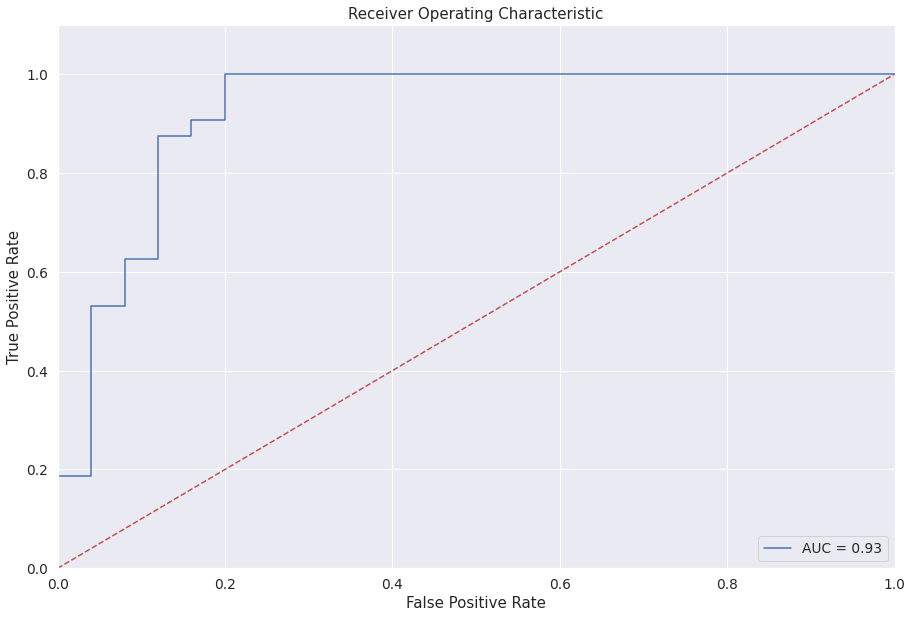

In [35]:
# we then take a look at the ROC curve

fpr, tpr, threshold = roc_curve(y_test, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
fn = ['asymptomatic', 'age', 'chol', 'male']
cn = ['Heart Disease', 'No Heart Disease']

<h4> Decision Tree </h4>

Next, we create a decision tree classifier that max depth is 2, meaning that the amount of branches it can create from the root state is 2. It's important to note that decision trees tend to overfit. We notice that this decision tree did great in classifying the different branches this tree could create. We can visually see this tree as well. 

In [37]:
dt = DecisionTreeClassifier(max_depth = 2, random_state = 43)
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.860


[Text(0.5, 0.8333333333333334, 'chol <= 0.5\ngini = 0.493\nsamples = 227\nvalue = [100, 127]\nclass = No Heart Disease'),
 Text(0.25, 0.5, 'age <= 56.5\ngini = 0.354\nsamples = 122\nvalue = [28, 94]\nclass = No Heart Disease'),
 Text(0.125, 0.16666666666666666, 'gini = 0.165\nsamples = 77\nvalue = [7, 70]\nclass = No Heart Disease'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 45\nvalue = [21, 24]\nclass = No Heart Disease'),
 Text(0.75, 0.5, 'male <= 303.5\ngini = 0.431\nsamples = 105\nvalue = [72, 33]\nclass = Heart Disease'),
 Text(0.625, 0.16666666666666666, 'gini = 0.456\nsamples = 94\nvalue = [61, 33]\nclass = Heart Disease'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Heart Disease')]

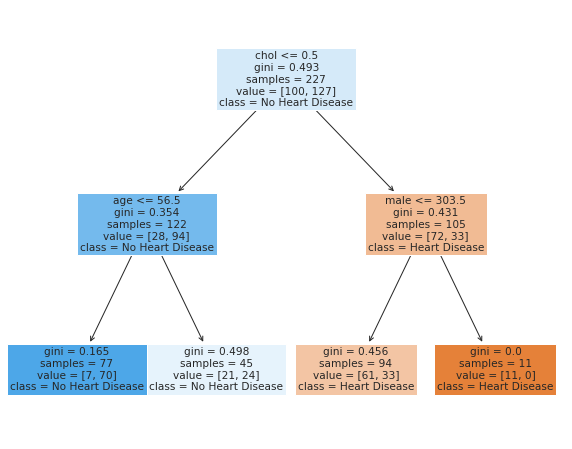

In [38]:
plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = fn, class_names = cn, filled = True)

Moving from the decision tree to the Random Forest classifier, we follow similar steps as the decision tree, but what happens under the hood is different. The random forest classifier is basically just a bunch of decision trees running in parallel. 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
rf = RandomForestClassifier(max_depth=2, random_state=43)
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
print("The accuracy of the Random Forest is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Random Forest is 0.912


[Text(0.5, 0.8333333333333334, 'chol <= 0.5\ngini = 0.485\nsamples = 152\nvalue = [94, 133]\nclass = No Heart Disease'),
 Text(0.25, 0.5, 'asymptomatic <= 0.5\ngini = 0.331\nsamples = 88\nvalue = [28, 106]\nclass = No Heart Disease'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 27\nvalue = [0, 36]\nclass = No Heart Disease'),
 Text(0.375, 0.16666666666666666, 'gini = 0.408\nsamples = 61\nvalue = [28, 70]\nclass = No Heart Disease'),
 Text(0.75, 0.5, 'asymptomatic <= 0.5\ngini = 0.412\nsamples = 64\nvalue = [66, 27]\nclass = Heart Disease'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 14\nvalue = [10, 11]\nclass = No Heart Disease'),
 Text(0.875, 0.16666666666666666, 'gini = 0.346\nsamples = 50\nvalue = [56, 16]\nclass = Heart Disease')]

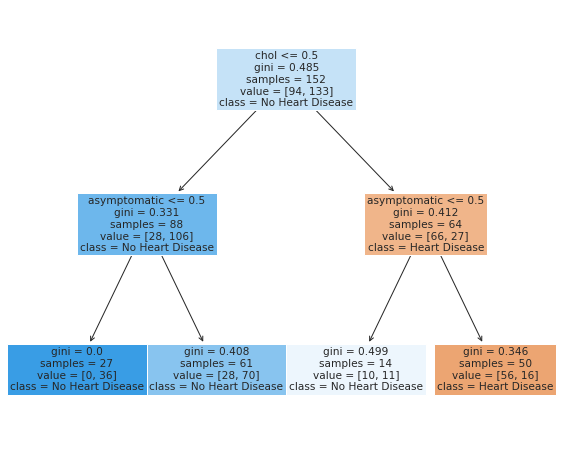

In [40]:
plt.figure(figsize=(10,8))
plot_tree(rf.estimators_[0], feature_names=fn, class_names=cn, filled=True)

<h4> K-Nearest-Neighbors </h4>

Looking now at the K-Nearest-Neighbors (KNN) classifier, we notice that it does not do as well compared to the decision trees. The KNN clusters the data points and tries to find a correlation based on the distance from one another.


In [41]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 17
# create an instance of neighbours classifier and fit data
clf = KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("The accuracy of the K-Nearest Neighbors is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the K-Nearest Neighbors is 0.544


Taking a look at the result of these classifiers, we can see that our random forest did the best in terms of classifying our features. Our features are the most relevant and available information about Jason's father that we wanted to dive deeper into. Based on creating this classifier, we measured features that were the most common among the dataset, being asymptomatic and male. Then taking a look into the possible key variables that can be looked at when determining heart disease, age and cholesterol. Based on these key features, we were able to create a fairly accurate classifier(s).

### Conclusion
After performing some exploratory data analysis to gain great insights about our overall dataset, we were able to find patterns and relations between the most common patients in our dataset and what Jasons' father was a part of. It is critical to learn from these datasets to help prevent future heart-attacks and gain greater insights about what populations to look into and what people with a distinct health-profile are at the most risk. We were able to generate classifiers that performed well in our overall dataset, find and build common profiles for people that tend to have heart-attacks, and overall learned more about what factors go into play for heart-disease. 

Through the use of Computer Science, we were able to make valuable conclusions and gain insight into what went into Jason's father's passing. 